In [77]:
import pandas as pd
import numpy as np
column_names = {"sub_date" :["10-24-25", "10-31-25", "11-05-25", "11-11-25", "12-01-25", "01-01-25", "01-15-25", "01-30-25", "02-05-25"], "address" : ["20000 Red St","62122 Blue St","1111 Purple Pl","6289 Pink Rd","92774 Yellow St","832974 Hazel Ct","82470 Green Rd","08012 Brown Ave","87678 Grey St"],"age" :["18","43","26","26","31","19","48","37","52"] ,"gender": ["M","M","F","M","M","F","NB","F","M"],"ethnicity": ["Caucasion","SE Asian","SE Asian","Black/African","Caucasion","Caucasion","S Asian","Hispanic","Caucasion"],"genre":["hip/hop","rock","hip/hop","folk","pop","hip/hop","folk","singer/songwriter","talk radio"],"content_type":["album","single","album","demo","demo","single","demo","single","podcast"],"sub_type":["monthly","monthly","NA","lump sum","monthly","NA","NA","monthly","lump sum"],"sub_status":["Y","Y","N","Y","Y","N","N","Y","Y"], "user_serial_number":["161","712","493","274","455","846","587","638","199"]}

Client_Tracking_Mock_df = pd.DataFrame(column_names)

### Mock Dataset

In [78]:
Client_Tracking_Mock_df

,sub_date,address,age,gender,ethnicity,genre,content_type,sub_type,sub_status,user_serial_number
0,10-24-25,20000 Red St,18,M,Caucasion,hip/hop,album,monthly,Y,161
1,10-31-25,62122 Blue St,43,M,SE Asian,rock,single,monthly,Y,712
2,11-05-25,1111 Purple Pl,26,F,SE Asian,hip/hop,album,NA,N,493
3,11-11-25,6289 Pink Rd,26,M,Black/African,folk,demo,lump sum,Y,274
4,12-01-25,92774 Yellow St,31,M,Caucasion,pop,demo,monthly,Y,455
5,01-01-25,832974 Hazel Ct,19,F,Caucasion,hip/hop,single,NA,N,846
6,01-15-25,82470 Green Rd,48,NB,S Asian,folk,demo,NA,N,587
7,01-30-25,08012 Brown Ave,37,F,Hispanic,singer/songwriter,single,monthly,Y,638
8,02-05-25,87678 Grey St,52,M,Caucasion,talk radio,podcast,lump sum,Y,199


#### Subsrciption Status For Different Genres

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'hip/hop'),
  Text(1, 0, 'rock'),
  Text(2, 0, 'folk'),
  Text(3, 0, 'pop'),
  Text(4, 0, 'singer/songwriter'),
  Text(5, 0, 'talk radio')])

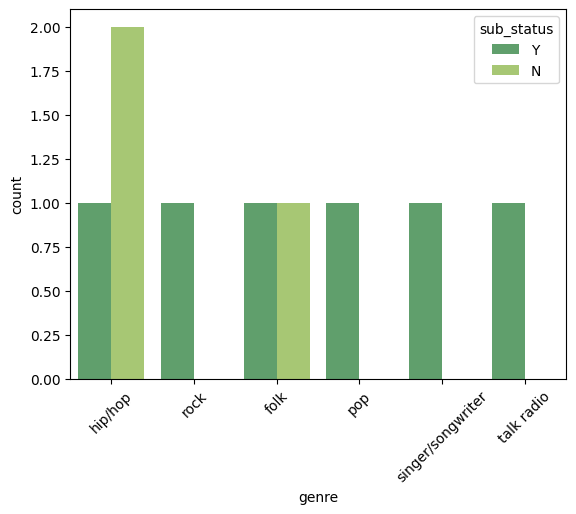

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "genre", data  = Client_Tracking_Mock_df, palette="summer", hue="sub_status")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'hip/hop'),
  Text(1, 0, 'rock'),
  Text(2, 0, 'folk'),
  Text(3, 0, 'pop'),
  Text(4, 0, 'singer/songwriter'),
  Text(5, 0, 'talk radio')])

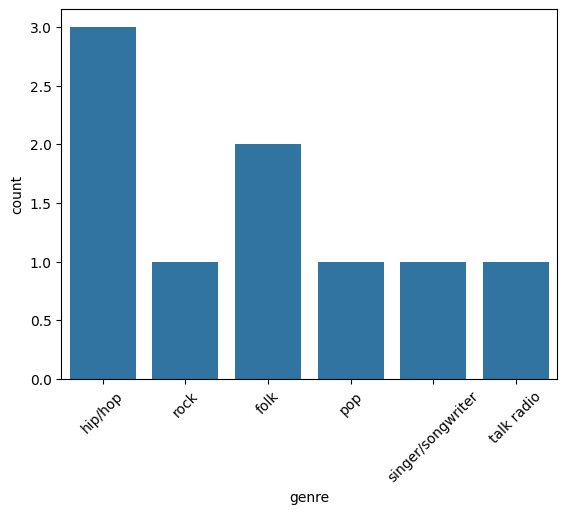

In [81]:
sns.countplot(x = "genre", data  = Client_Tracking_Mock_df)
plt.xticks(rotation=45)

#### Subscription Status for Different Content Types

([0, 1, 2, 3],
 [Text(0, 0, 'album'),
  Text(1, 0, 'single'),
  Text(2, 0, 'demo'),
  Text(3, 0, 'podcast')])

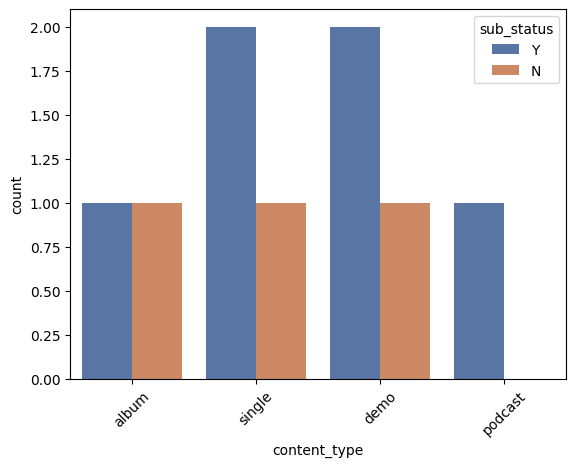

In [82]:
sns.countplot(x = "content_type", data  = Client_Tracking_Mock_df, palette="deep", hue="sub_status")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'album'),
  Text(1, 0, 'single'),
  Text(2, 0, 'demo'),
  Text(3, 0, 'podcast')])

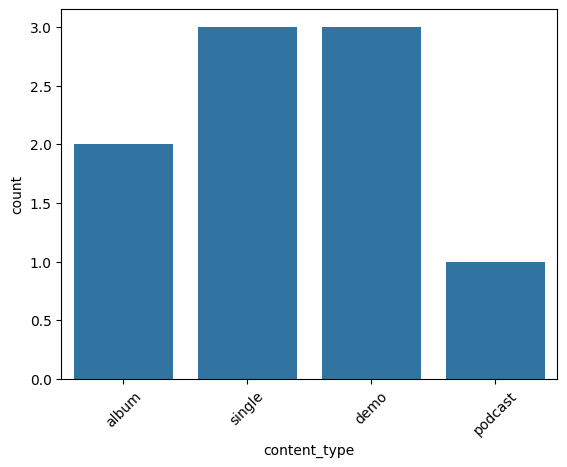

In [83]:
sns.countplot(x = "content_type", data  = Client_Tracking_Mock_df)
plt.xticks(rotation=45)

#### Age Group Distribution

In [84]:
#sns.scatterplot(x = "sub_status", y = "age", data = Client_Tracking_Mock_df)

Client_Tracking_Mock_df['age'] = Client_Tracking_Mock_df["age"].astype("float")

import plotly.express as px

fig = px.scatter(
    Client_Tracking_Mock_df,
    y="age",
    x="sub_status",
    hover_data=["sub_type", "address", "ethnicity", "genre", "content_type"]
)
fig.show()


##### Address Distrubution

*I know you mentioned location/where clients are coming from was important to you. Address is a key metric when trying to learn more about this. The visual below is a map of virginia.*

*Theoretically, I (or someone), would take the address of a client and convert it to their longitudinal and latidunal coordinates. With this information, we can creat a heatmap. A heatmap is a type of graph that represents density as a function of color intensity. AKA, if we have a map of NOVA where Arlington is light red, and Falls Church is dark red, that means a larger portion of your client base is coming from Falls Church than Arlington.*

*Here's an example heatmap of the United States from a previous project about Public Health:*


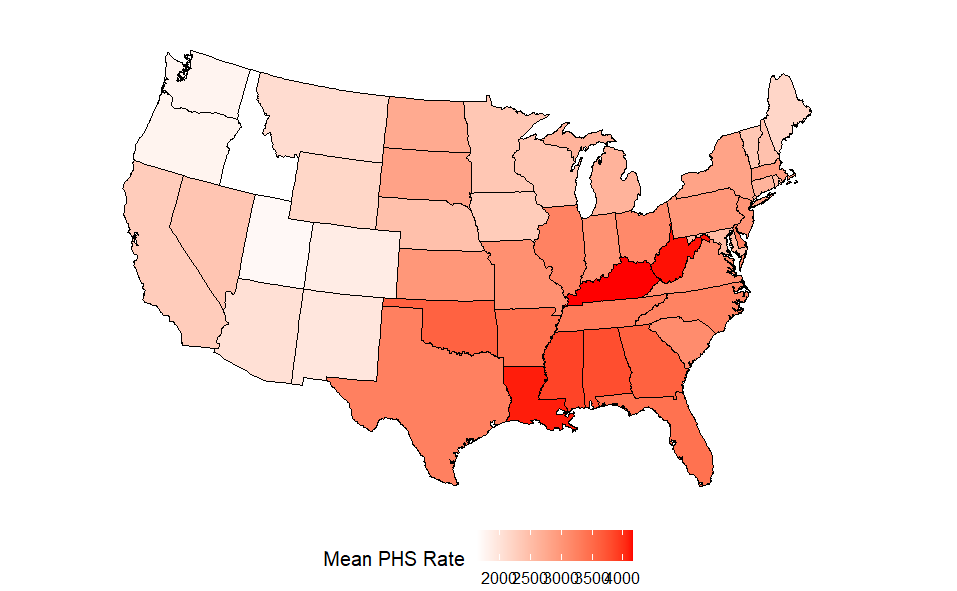


In [ ]:
# I would need to derive actual longitude and latitudes from the addresses to plot the, but I made 
# up these addresses as examples and don't have access to their cordinates!

#38.8816° N, 77.0910° W

import folium
from folium.plugins import HeatMap


m = folium.Map(location=[38.8816, 77.0910], zoom_start=10)

*This is the map we will be working with*

In [41]:
m

*I looked more into the publicly available data on WMATA, and it appears that up to date information about ridership does require special access, or some sort of preexisitng relationship with the organization. However what we could do is bin the long/lat data into regions and color coordinate them by how metro accessible they are (1 line, 2 lines 3 lines, etc)*

### Machine Learning:
*How Can We Better Understand, or Predict from this Dataset?*
###### This is typically more useful as client base expands

In [86]:
Client_Tracking_Mock_df.columns

Index(['sub_date', 'address', 'age', 'gender', 'ethnicity', 'genre',
       'content_type', 'sub_type', 'sub_status', 'user_serial_number'],
      dtype='object')

In [93]:
from sklearn.linear_model import LogisticRegression

X = Client_Tracking_Mock_df[['sub_date', 'address', 'age', 'gender', 'ethnicity', 'genre',
       'content_type']].astype('category').apply(lambda x: x.cat.codes)

y = Client_Tracking_Mock_df['sub_status'].astype('category')

*We are going to work with two models. One is meant to help us determine which variables are most salient in a client's decision to ultimately subcribe to your service. This is called the Logistic Regression model. The other is a type of clustering algorithm. Clustering algorithms separate all of the clients in the dataset into groups based on series of computations. Ultimately, this is meant to detect behavioral/demographic patterns among clients. This would be particularly helpful if you are say, working with a group of new clients that don't have certain information yet. Based on what we know, we can assign them to a prexisting cluster group to get a better idea of what they might appreciate or need.*

*Not every algorithmic outcome should be taken to heart, especially when the dataset is small (and the clients are made up!). The more client samples available, the more trustworthy the results.*

*This is the creation, and fitting of our model. Where we outline the formula, and plug in the desired data*

### Logistic Regression Model

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model on training data
lin_model = LogisticRegression(max_iter=1000)
lin_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [102]:
probabilities = lin_model.predict_proba(X_test)

y_preds = lin_model.predict(X_test)

In [103]:
y

0    Y
1    Y
2    N
3    Y
4    Y
5    N
6    N
7    Y
8    Y
Name: sub_status, dtype: category
Categories (2, object): ['N', 'Y']

### Prediction and Probabilities Based on a Logistic Regression Model

In [106]:
y_preds, probabilities, y_test

(array(['N', 'N'], dtype=object),
 array([[0.771362  , 0.228638  ],
        [0.76024117, 0.23975883]]),
 7    Y
 1    Y
 Name: sub_status, dtype: category
 Categories (2, object): ['N', 'Y'])

*This is our accuracy score. It's low (zero!) because our sample size is too small. However, what the Logistic Regression is doing is predicting whether or not a client subscribed, based on previous data. Because we have so little data, this would be difficult to predict.*

In [105]:
accuracy_score(y_test, y_preds)

0.0

### Variable Importance
*After completeing our regression model, varibale importance will tell us which client factors play the biggest role in the decision to become a subscribed member*

In [107]:
importance = pd.Series(lin_model.coef_[0], index=X.columns)
importance = importance.abs().sort_values(ascending = False)
importance

ethnicity       0.869583
sub_date        0.516668
genre           0.467765
gender          0.326458
content_type    0.258758
address         0.154809
age             0.071944
dtype: float64

*While ethnicity is at the top and address is at the bottom for variable importance, bare in mind that I made this data up! It's not indicative of the actual consumer patterns your clients*

### K-means clustering (Grouping Clients)

*We are going to set the model to have 3 total clusters. Each client will be grouped into one of the three clusters based on a series of computations*

In [ ]:
from sklearn.cluster import KMeans

# model setup and fitting
kmeans_model = KMeans(n_clusters = 3, random_state=0)

kmeans_model.fit(X)

#cluster labels for each data point
labels = kmeans_model.labels_

In [74]:
kmeans_model.cluster_centers_

array([[7.5       , 6.        , 2.5       , 1.        , 0.5       ,
        1.        , 1.        , 3.5       ],
       [1.5       , 4.5       , 4.5       , 0.75      , 1.75      ,
        2.5       , 2.25      , 6.5       ],
       [5.        , 2.        , 2.33333333, 0.66666667, 3.        ,
        1.66666667, 1.        , 1.        ]])

*The cell with the word labels shows the group assignment of each client. The order is the same as in the original dataset*

In [75]:
labels

array([2, 2, 2, 0, 0, 1, 1, 1, 1], dtype=int32)

*The following graph is comparing the ethnicity and age of your clients. The important here is the color of each data point. The color represents the cluster to which a given client belongs.*

In [109]:
import plotly.express as px

Client_Tracking_Mock_df["Cluster_Labels"] = labels
Client_Tracking_Mock_df["age"] = Client_Tracking_Mock_df["age"].sort_values()

fig = px.scatter(
    Client_Tracking_Mock_df,
    y= "age",
    x="ethnicity",
    color="Cluster_Labels",
    symbol="Cluster_Labels",
    hover_data=Client_Tracking_Mock_df.columns
)
fig.show()

*If you open the file in a coding friendly platform, you can hover your mouse over the data point and it will tell you all of the information about a given client.*

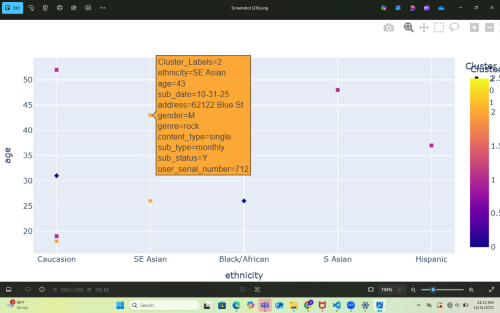